# แบบฝึกหัด messi

เอกสารประกอบ
- https://www.kaggle.com/datasets/azminetoushikwasi/-lionel-messi-all-club-goals/code

![title](messi.png)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('data.csv')
df.sample(1)

Season Competition Matchday     Date Venue          Club   Opponent  \
142  10/11      LaLiga       10  11/7/10     A  FC Barcelona  Getafe CF   

    Result Playing_Position Minute At_score              Type  Goal_assist  
142    1:3               CF     23      0:1  Left-footed shot  David Villa

#### ใครคือคนที่จ่ายให้ Messi ยิงเยอะที่สุด

In [3]:
k = df.groupby('Goal_assist').size()
pd.DataFrame(k).sort_values(0,ascending=False).head(5)

0
Goal_assist       
Luis Suarez     48
Dani Alves      42
Andres Iniesta  39
Xavi            34
Pedro           29

#### ยิงแฮตทริกไปแล้วกี่ครั้ง 

In [4]:
k = df.groupby('Date').size()>=3 
len(k[k==True])

48

#### Messi ยิงประตูเท้าซ้ายเยอะสุด

In [5]:
df.groupby('Type').size()

Type
Chest                       1
Counter attack goal         1
Deflected shot on goal      2
Direct free kick           50
Header                     24
Left-footed shot          420
Long distance kick          1
Penalty                    84
Penalty rebound             3
Right-footed shot          81
Solo run                    4
Tap-in                      9
dtype: int64

#### ท๊อปฟอร์มเดือนไหน? :  ยิงเฉลี่ยแต่ละเดือน

<AxesSubplot:xlabel='month'>

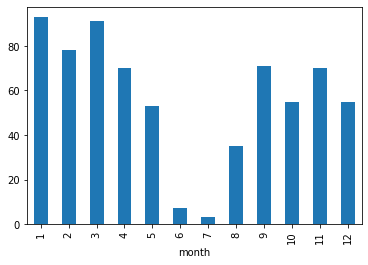

In [10]:
df['DateM'] = pd.to_datetime(df['Date'])
df['month'] = df['DateM'].dt.month
df.groupby('month').size().plot(kind='bar')

#### ดู histogram ส่วนใหญ่จะยิงลูกนึง

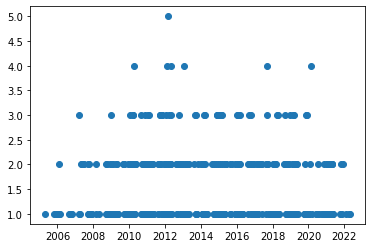

In [22]:
k = df.groupby('DateM').size()
k = pd.DataFrame(k).sort_index()
plt.scatter(k.index,k.values)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

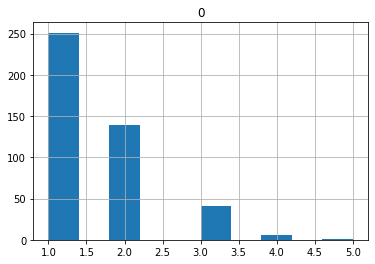

In [23]:
k.hist()

#### ถ้า messi ยิงได้ มีโอกาสแพ้ชนะ เป็นเท่าใด

In [102]:
df.sample(1)

Season Competition Matchday     Date Venue          Club  \
83  09/10      LaLiga        3  9/19/09     H  FC Barcelona   

              Opponent Result Playing_Position Minute At_score  \
83  Atletico de Madrid    5:2               RW     15      2:0   

                Type Goal_assist      DateM  month scoreH scoreA result  
83  Left-footed shot        Xavi 2009-09-19      9      5      2      W

In [103]:
df.groupby('Venue').size()  #ตรวจสอบสถานะ

Venue
A    271
H    410
dtype: int64

In [85]:
df['scoreH'] =  [i[0] for i in df['Result'].str.split(':')]
df['scoreA'] =  [i[1] for i in df['Result'].str.split(':')]

In [100]:
result = []
for i in range(len(df)):
    if(df.iloc[i]['Venue']=='A'):
        if(df.iloc[i]['scoreA']>df.iloc[i]['scoreH']):
          result.append('W')
        elif(df.iloc[i]['scoreA']<df.iloc[i]['scoreH']):
          result.append('L')
        else:
          result.append('D')  
    elif(df.iloc[i]['Venue']=='H'):
        if(df.iloc[i]['scoreH']>df.iloc[i]['scoreA']):
          result.append('W')
        elif(df.iloc[i]['scoreH']<df.iloc[i]['scoreA']):
          result.append('L')
        else:
          result.append('D') 

In [104]:
df['result'] = result

In [105]:
df.sample(5)

Season            Competition Matchday     Date Venue          Club  \
508  17/18                 LaLiga        2  8/26/17     A  FC Barcelona   
602  18/19           Copa del Rey    Final  5/25/19     H  FC Barcelona   
21   06/07                 LaLiga       35  5/20/07     A  FC Barcelona   
39   07/08  UEFA Champions League  last 16  2/20/08     A  FC Barcelona   
30   07/08                 LaLiga        5  9/26/07     H  FC Barcelona   

               Opponent Result Playing_Position Minute At_score  \
508    Deportivo Alaves    0:2               CF     55      0:1   
602         Valencia CF    1:2              CF      73      1:2   
21   Atletico de Madrid    0:6               RW     80      0:5   
39            Celtic FC    2:3               RW     79      2:3   
30        Real Zaragoza    4:1               RW     10      2:1   

                 Type               Goal_assist      DateM  month scoreH  \
508  Left-footed shot                Jordi Alba 2017-08-26      8      0   
602  Left-footed shot           Clement Lenglet 2019-05-25      5      1   
21   Left-footed shot  Giovanni van Bronckhorst 2007-05-20      5      0   
39   Left-footed shot                       NaN 2008-02-20      2      2   
30   Left-footed shot                      Deco 2007-09-26      9      4   

    scoreA result  
508      2      W  
602      2      L  
21       6      W  
39       3      W  
30       1      W

In [112]:
k = df[df['result']=='L'].groupby('Date').size()
k

Date
1/19/11     1
1/19/13     1
1/5/17      1
1/9/20      1
11/1/16     1
11/11/18    2
11/2/19     1
11/7/12     1
2/1/14      1
2/16/21     1
2/22/14     1
3/1/09      1
3/2/13      1
4/17/16     1
4/29/21     1
5/16/21     1
5/25/19     1
7/16/20     1
8/13/17     1
8/29/12     1
9/30/14     1
dtype: int64

In [113]:
#มี 21 นัดที่ messi ยิงได้แล้วทีมแพ้
len(k)

#มี 1 นัดที่ยิงได้สองประตู แต่ทีมก็ยังแพ้

21